# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [1]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

C:\Users\Nicole Yershov\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


### Step 2: Read in your data set

In [2]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset?


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:

#### Question 2. Create a summary table.

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because the units are larger. Plus or minus a STD from the mean of the variable shows that most observations of that variable fall in this range.

#### Question 4. Drop data points with missing data.


In [8]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: Not sure actually because I would expect the number of nows to be 398 rather than 397 because that is the count of GPA and GRE 

#### Question 6. Create box plots for GRE and GPA.

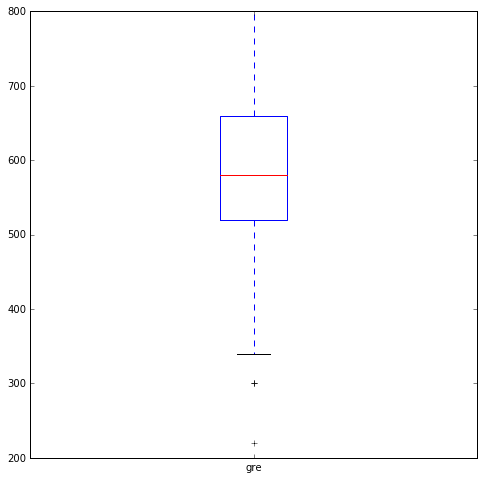

In [20]:
df_raw.gre.plot(kind='box', figsize=(8,8))

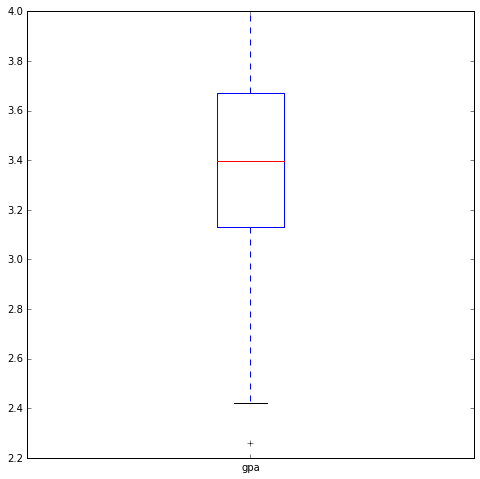

In [17]:
df_raw.gpa.plot(kind='box', figsize=(8,8))

#### Question 7. What do this plots show?

Answer: The red line in the mean, the box shows the quartile 2 and 4 range, while the black line shows Q2*1.5

#### Question 8. Describe each distribution.

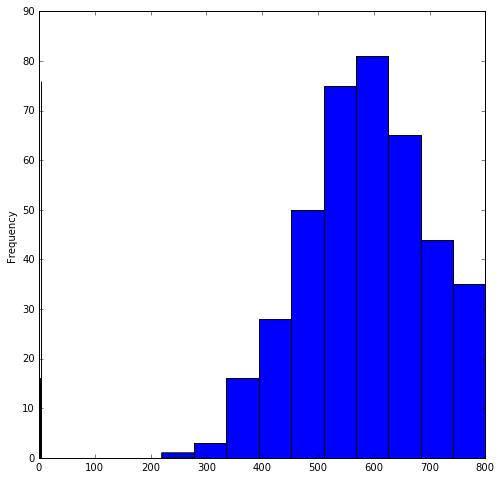

In [35]:
df_raw.gre.plot(kind="hist", figsize=(8,8))
df_raw.gpa.plot(kind="hist", figsize=(8,8))

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: Yes, GRE and GPA are normally distributed so model would have normal distribution 

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: Both GRE and GPA are slightly skewed to the left but it does not seem that the skewness is so great that it would need to be corrected

#### Question 11. Which of our variables are potentially colinear?

In [36]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE are slightly correlated (.38)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: we could regress the prestige of undergrauate schools on grad school admissions rates 

#### Question 14. What is your hypothesis?

Answer: That there is a positive association between the prestige of the undergraduate school and grad school admissions rates

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.

In [39]:
# could not find the correct formula, tried: df_raw['loggre'] = ln(df_raw.gre)

NameError: name 'ln' is not defined